#           APPLIED DATA PROGRAMMING | COURSEWORK 2  | GROUP 4 


# 

# 1. INTRODUCTION

The "SUPPORT2" dataset was developed to create a model for predicting 180-day survival in seriously ill hospitalised adults. Funded by the Robert Wood Johnson Foundation, it includes records from U.S. hospitals, containing sensitive information such as race and gender.The dataset was collected in two phases (1989-1991 and 1992-1994)and aims to improve end-of-life decision-making and care. 

In this project, we will:

- Conduct an initial data analysis (IDA) to understand the dataset's structure and quality. 

- Perform an exploratory data analysis (EDA) to identify patterns, trends, and correlations.

- Use visualisations and descriptive statistics to summarise the data.

- Address missing values and outliers.

- Conclude with key findings and recommendations based on the analysis.


This above approach will help us gain insights into the dataset and its implications for patient care and prognosis. We will utilise several key libraries to facilitate our data analysis and visualisation tasks. These include:

- NumPy: Essential for performing numerical computations and efficiently handling arrays.
- Pandas: Crucial for data manipulation and analysis, providing powerful data structures like DataFrames.
- Matplotlib: Used for creating a wide range of static, interactive, and animated visualisations.
- Seaborn: Enhances Matplotlib's capabilities by offering attractive and informative statistical graphics.
- Missingno : Helps visualise and understand the presence and distribution of missing data within our dataset. 
- Warnings : Suppresses any unnecessary warnings that might clutter the output, ensuring a cleaner and more readable analysis.

These libraries collectively enable us to efficiently manage, analyze, and visualize the dataset, ensuring a comprehensive and insightful analysis.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/ashleydaud/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 

# 2. Initial Data Analysis (IDA) : 

In this part, we will conduct an Initial Data Analysis (IDA) to thoroughly understand the dataset. This process includes evaluating the overall structure and quality of the data, summarising important statistics, and pinpointing any potential issues that need to be resolved.



# 2.1 General information and overview

In [2]:
# Loading the dataset into a DataFrame for analysis
df = pd.read_csv('support2-1.csv')

In [3]:
#Displaying the first 5 rows of the dataset to get an initial look at the data
df.head(5)

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [4]:
#Displaying the last 5 rows of the dataset to examine the data at the end of the DataFrame
df.tail(5)

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
9100,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9101,9102,55.15399,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9102,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9103,9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000
9104,9105,81.53894,1,female,0,12,198,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.199951,137.0,7.289062,187.0,15.0,NaN,0.0,NaN,no(M2 and SIP pres),0.494751


In [5]:
#The dimensions of the dataset (number of rows and columns)
df.shape

(9105, 48)

In [6]:
#Displayes a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [7]:
#A list of all the column names in the dataset
df.keys()

Index(['ID', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [8]:
#Displays the descriptive statistics for the numerical columns in the dataset
df.describe()

,ID,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [9]:
#Displays the descriptive statistics for the categorical and boolean columns in the dataset
df.describe(include=["object", "bool"])

,sex,dzgroup,dzclass,income,race,ca,dnr,sfdm2
count,9105,9105,9105,6123,9063,9105,9075,7705
unique,2,8,4,4,5,3,3,5
top,male,ARF/MOSF w/Sepsis,ARF/MOSF,under $11k,white,no,no dnr,<2 mo. follow-up
freq,5125,3515,4227,2855,7191,5995,5880,3123


# 

# 2.2 Data Quality Check 

<Axes: >

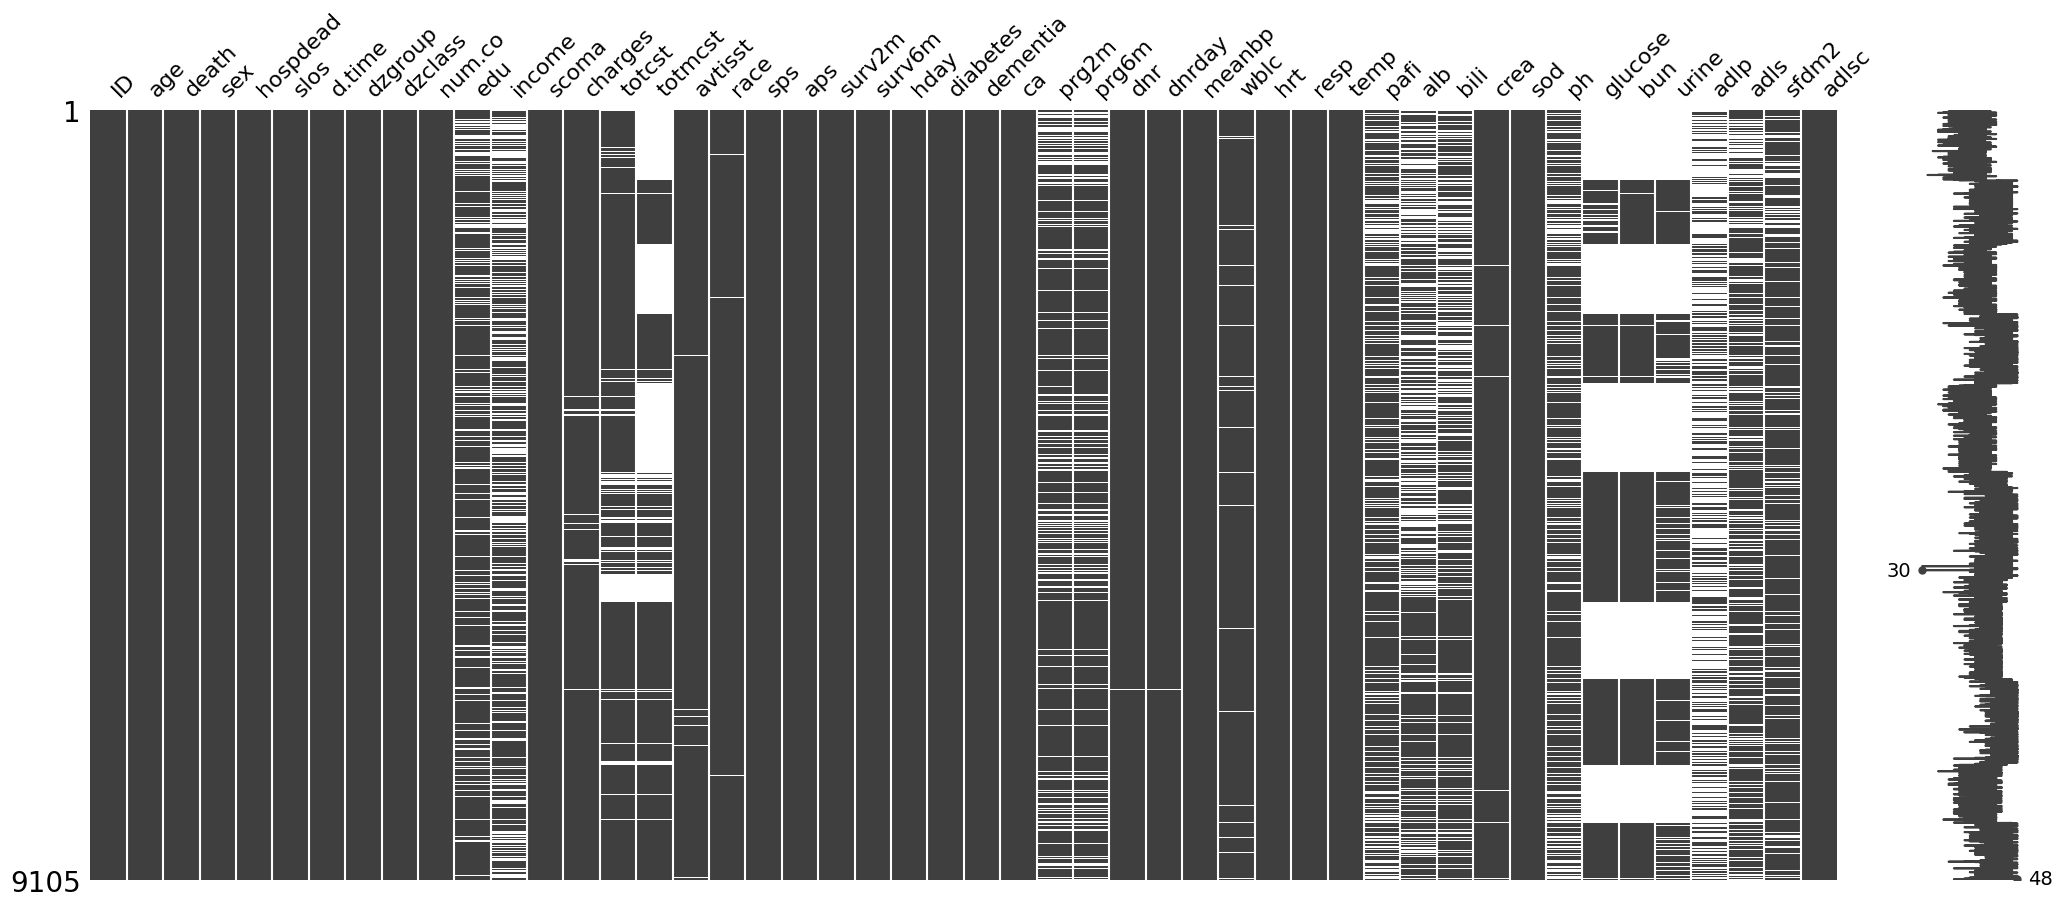

In [10]:
#Visualising the missing data in the dataset using a matrix plot
msno.matrix(df)

The missingno matrix visualises missing data in a dataset, where white lines represent missing values and black lines indicate present values, helping to quickly identify patterns and gaps in the data.

In [12]:
#Identifying the number of duplicate rows in the dataset
df.duplicated().sum()

0

In [13]:
#Identifying the number of missing values in each column of the dataset
df.isnull().sum()

ID             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
sfdm2       1400
adlsc          0
dtype: int64


# 2.3 Data Cleaning

In [14]:
#The lst of information for all  columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [15]:
#Identifying the number of missing values in each column of the dataset
df.isnull().sum()

ID             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
sfdm2       1400
adlsc          0
dtype: int64

# 

In [16]:
# the descriptive statistics for the 'avtisst' column
df['avtisst'].describe()

count    9023.000000
mean       22.610928
std        13.233248
min         1.000000
25%        12.000000
50%        19.500000
75%        31.666656
max        83.000000
Name: avtisst, dtype: float64

In [17]:
#replacing null values with 0 to indicate "no score."
df['avtisst'].fillna(0, inplace=True)

In [18]:
#the number of missing values in the 'avtisst' column
df['avtisst'].isnull().sum()

0

# 

In [19]:
# the descriptive statistics for the 'edu' column
df['edu'].describe()

count    7471.000000
mean       11.747691
std         3.447743
min         0.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        31.000000
Name: edu, dtype: float64

In [20]:
#Displaying the mode of the 'edu' column
edu_mode = df['edu'].mode()
print(edu_mode )

0    12.0
Name: edu, dtype: float64


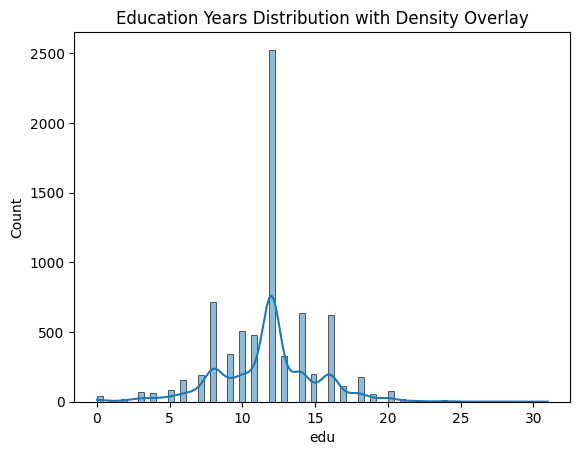

In [21]:
# A histogram to visualise the distribution of education years in the 'edu' column,
# Also with a KDE overlay to show the data's density

sns.histplot(df['edu'], kde=True)
plt.title('Education Years Distribution with Density Overlay')
plt.show()


In [22]:
# Fill missing values in 'edu' with its mode
df['edu'] =  df['edu'].fillna('edu_mode')

In [23]:
#the number of missing values in the 'edu' column
df['edu'].isnull().sum()

0

# 

In [24]:
#Calculating the median charges for each disease group
charges_median = df.groupby('dzgroup')['charges'].median()
print(charges_median)

dzgroup
ARF/MOSF w/Sepsis    57927.031
CHF                  10108.000
COPD                 11622.500
Cirrhosis            15258.000
Colon Cancer         10829.000
Coma                 31177.000
Lung Cancer           8297.000
MOSF w/Malig         47185.500
Name: charges, dtype: float64


In [25]:
# Filling the missing values in 'charges' with the median charges of the corresponding disease group
df['charges'].fillna(df['dzgroup'].map(charges_median) , inplace = True)

In [26]:
#the number of missing values in the 'charges' column
df['charges'].isnull().sum()

0

# 
Weighted Percentile-Based Imputation: Fills missing values using a weighted average of the 25th and 50th percentiles to balance lower and central data tendencies.

In [27]:
# the descriptive statistics for the 'totcst' column
df['totcst'].describe()

count      8217.000000
mean      30825.867768
std       45780.820986
min           0.000000
25%        5929.566400
50%       14452.734400
75%       36087.937500
max      633212.000000
Name: totcst, dtype: float64

In [28]:
# Compute weighted average of 25th and 50th percentiles
percentile_25 = df['totcst'].quantile(0.25)
#Calculates the 25th percentile (Q1) of the totcst column. This is the value below which 25% of the data lies.

percentile_50 = df['totcst'].quantile(0.5)
#Calculates the 50th percentile (median) of the totcst column. This is the middle value of the data (less affected by outliers).

#These are weights assigned to the 25th and 50th percentiles, respectively. The sum of the weights is typically 1
# Define weights
weight_25 = 0.4  #25th percentile contributes 40%.
weight_50 = 0.6  #50th percentile contributes 60%

# Weighted imputation
df['totcst'].fillna(weight_25 * percentile_25 + weight_50 * percentile_50, inplace=True)

In [29]:
#the number of missing values in the 'totcst' column
df['totcst'].isnull().sum()

0

# 

In [30]:
# the descriptive statistics for the 'totmcst' column
df['totmcst'].describe()

count      5630.000000
mean      28828.877838
std       43604.261932
min        -102.719970
25%        5177.404300
50%       13223.500000
75%       34223.601600
max      710682.000000
Name: totmcst, dtype: float64

In [31]:
# Compute the percentiles
percentile_25 = df['totmcst'].quantile(0.25)
percentile_50 = df['totmcst'].quantile(0.5)

# Define weights
weight_25 = 0.4  # Adjust as needed
weight_50 = 0.6

# Calculate the weighted average
weighted_value = weight_25 * percentile_25 + weight_50 * percentile_50

# Fill missing values with the weighted average
df['totmcst'].fillna(weighted_value, inplace=True)

In [32]:
#the number of missing values in the 'totmcst' column
df['totmcst'].isnull().sum()

0

# 

In [33]:
#Filling the missing values in 'race', 'income', 'dnr', and 'sfdm2' columns with specified default values
df['race'].fillna('Unavailable', inplace=True)
df['income'].fillna('Unavailable', inplace=True)
df['dnr'].fillna('Unknown Decision', inplace = True)
df['sfdm2'].fillna('Unavailable', inplace = True)

The codes below fill in missing values for specific baseline physiological variables with recommended normal values. This ensures that the dataset is complete and ready for analysis, avoiding potential biases or errors that could arise from missing data. 

Reference : https://hbiostat.org/data/repo/supportdesc

In [34]:
df['alb'] = df['alb'].fillna(3.5)
df['pafi'] = df['pafi'].fillna(333.3)
df['bili'] = df['bili'].fillna(1.01)
df['crea'] = df['crea'].fillna(1.01)
df['bun'] = df['bun'].fillna(6.51)
df['wblc'] = df['wblc'].fillna (9000)
df['urine'] = df['urine'].fillna(2502)

The missing values in the columns [sps, scoma, aps, surv2m, surv6m, prg2m, prg6m, dnrday, meanbp, hrt, resp, temp, sod, ph, glucose, adlp, and adls] represent gaps in the medical data that are closely related to the patients' clinical situations. These gaps exist because certain tests weren't done or measurements weren't available.

Filling these gaps with random or estimated data could affect the accuracy of data and may lead to misled conclusions, especially with sensitive medical conditions. By keeping these values as NaN, we respect the real-world complexities of medical data and ensure our analysis stays true to the actual information without adding inaccuracies.

In [35]:
#The number of missing values in each column of the DataFrame
df.isnull().sum()

ID             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu            0
income         0
scoma          1
charges        0
totcst         0
totmcst        0
avtisst        0
race           0
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr            0
dnrday        30
meanbp         1
wblc           0
hrt            1
resp           1
temp           1
pafi           0
alb            0
bili           0
crea           0
sod            1
ph          2284
glucose     4500
bun            0
urine          0
adlp        5641
adls        2867
sfdm2          0
adlsc          0
dtype: int64

# 

In [36]:
#Converting the 'age' column from its flot64 data type to int64, useful for numerical calculations
df['age'] = df['age'].astype('int')

# 

In [37]:
#Renaming columns to make them more readable and consistent
df = df.rename(columns={
    'ID': 'id',
    'age': 'age',
    'death': 'death',
    'sex': 'gender',
    'hospdead': 'hospital_death',
    'slos': 'Study_Days',
    'd.time': 'Followup_Days',
    'dzgroup': 'Disease_Subcategory',
    'dzclass': 'Disease_Category',
    'num.co': 'Comorbidities_Count',
    'crea': 'Creatinine',
    'edu': 'Education_Years',
    'Income':'Income',
    'scoma':'Coma_Score',
    'charges':'Hospital_Charges',
    'totcst':'Total_Cost',
    'totmcst':'Micro_Cost',
    'avtisst':'Avg_TISS_Score',
    'race':'Race',
    'sps':'Physiology_Score',
    'aps':'APACHE_Score',
    'surv2m' :'Survival_2m',
    'surv6m' :'Survival_6m',
    'hday' :'Hospital_Day',
    'diabetes':'Diabetes',
    'dementia' :'Dementia',
    'ca' :'Cancer_Status',
    'prg2m':'Physician_Survival_2m',
    'prg6m':'Physician_Survival_6m',
    'dnr':'DNR_Status',
    'dnrday' :'DNR_Day',
    'meanbp' :'Mean_BP',
    'wblc' :'WBC_Count',
    'hrt':'Heart_Rate',
    'resp'    :'Respiration_Rate',
    'temp' :'Temperature',
    'pafi'   :'PaO2_FiO2_Ratio',
    'alb'  :'Albumin',
    'bili'    :'Bilirubin',
    'crea': 'Creatinine',
    'sod': 'sodium',
    'ph': 'Blood_pH',
    'glucose': 'Glucose',
    'bun': 'blood_urea_nitrogen',
    'urine': 'Urine_Output',
    'adlp': 'ADL_Patient',
    'adls': 'ADL_Surrogate',
    'sfdm2': 'Functional_Disability',
    'adlsc': 'ADL_Calibrated'

})

In [38]:
df

,id,age,death,gender,hospital_death,Study_Days,Followup_Days,Disease_Subcategory,Disease_Category,Comorbidities_Count,...,Creatinine,sodium,Blood_pH,Glucose,blood_urea_nitrogen,Urine_Output,ADL_Patient,ADL_Surrogate,Functional_Disability,ADL_Calibrated
0,1,62,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,6.51,2502.0,7.0,7.0,Unavailable,7.000000
1,2,60,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,6.51,2502.0,NaN,1.0,<2 mo. follow-up,1.000000
2,3,52,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,6.51,2502.0,1.0,0.0,<2 mo. follow-up,0.000000
3,4,42,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,6.51,2502.0,0.0,0.0,no(M2 and SIP pres),0.000000
4,5,79,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,6.51,2502.0,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,9101,66,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.00,2502.0,NaN,0.0,Unavailable,0.000000
9101,9102,55,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.00,0.0,NaN,0.0,Unavailable,0.000000
9102,9103,70,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.00,3900.0,NaN,NaN,Unavailable,2.525391
9103,9104,47,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.00,2502.0,NaN,0.0,<2 mo. follow-up,0.000000


# 


# 3. Exploratory Data Analysis ( EDA)
In this section, we will conduct an Exploratory Data Analysis (EDA) to gain insights into the dataset. This will include visualisations of both continuous and categorical features, as well as an examination of trends and patterns through correlations and associations. Additionally, we will identify and analyse outliers, which can reveal significant variability, potential errors, or novel insights.

# 3.1 Outliers in the Dataset

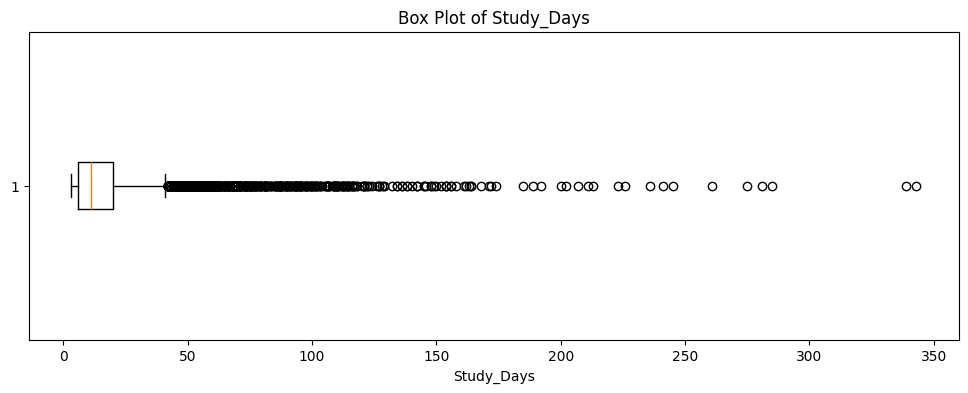

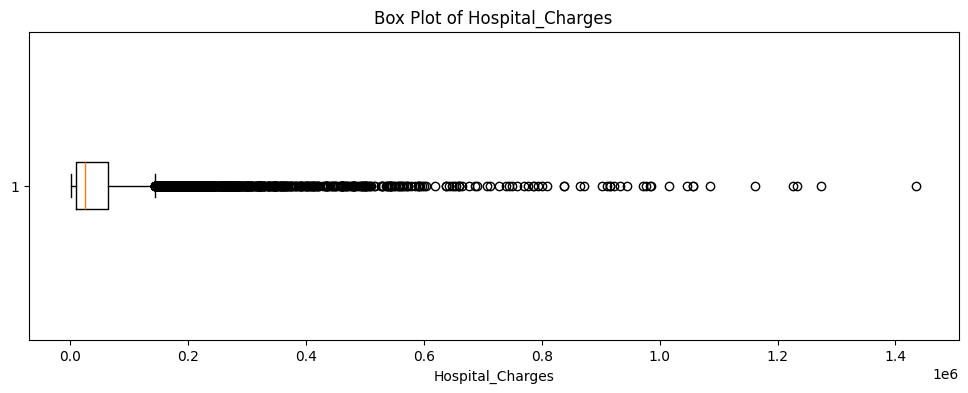

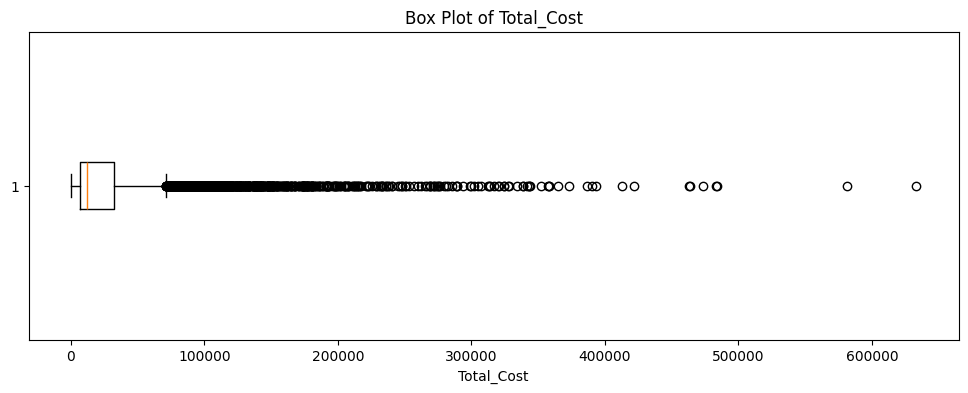

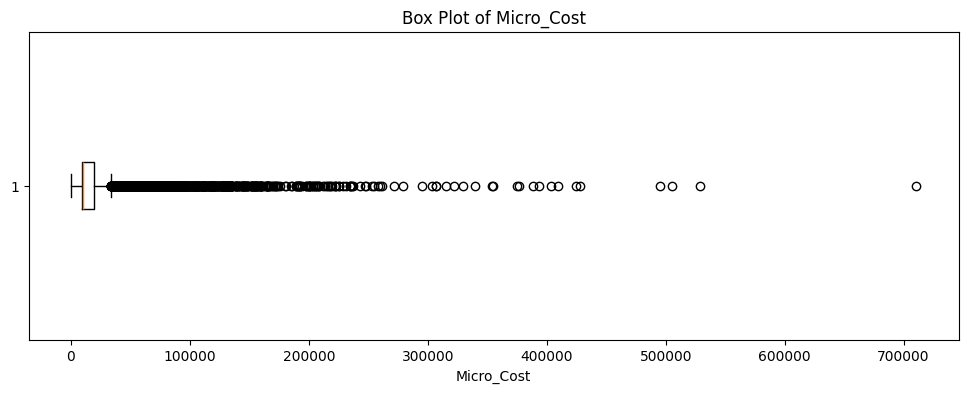

In [39]:
# List of columns to plot
columns_to_plot = ['Study_Days', 'Hospital_Charges', 'Total_Cost', 'Micro_Cost']

# Plot boxplots for each column
for column in columns_to_plot:
    plt.figure(figsize=(12, 4))
    # Create a horizontal box plot for the column, excluding NaN values
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

- For all metrics, the data is predominantly clustered within a narrow range (small IQR), with medians positioned near the lower end.
- Numerous outliers indicate exceptional cases involving unusually high costs or extended durations.
- These outliers probably correspond to patients with unique or severe medical conditions, complex treatment paths, or specialized care needs.
- The positive skewness across all metrics suggests that while most patients have typical outcomes, a small group demands significantly higher resources.

# 3.2 Frequency Distribution of Categorical Variables

In [40]:
# value counts for categorical variables
print(
    df.gender.value_counts(), '\n\n',
    df.Disease_Subcategory.value_counts(), '\n\n',
    df.Disease_Category.value_counts(), '\n\n',
    df.income.value_counts(), '\n\n',
    df.Race.value_counts(), '\n\n',
    df.Cancer_Status.value_counts(), '\n\n',
    df.DNR_Status.value_counts()
)

gender
male      5125
female    3980
Name: count, dtype: int64 

 Disease_Subcategory
ARF/MOSF w/Sepsis    3515
CHF                  1387
COPD                  967
Lung Cancer           908
MOSF w/Malig          712
Coma                  596
Colon Cancer          512
Cirrhosis             508
Name: count, dtype: int64 

 Disease_Category
ARF/MOSF              4227
COPD/CHF/Cirrhosis    2862
Cancer                1420
Coma                   596
Name: count, dtype: int64 

 income
Unavailable    2982
under $11k     2855
$11-$25k       1527
$25-$50k       1057
>$50k           684
Name: count, dtype: int64 

 Race
white          7191
black          1391
hispanic        290
other           112
asian            79
Unavailable      42
Name: count, dtype: int64 

 Cancer_Status
no            5995
metastatic    1858
yes           1252
Name: count, dtype: int64 

 DNR_Status
no dnr              5880
dnr after sadm      2956
dnr before sadm      239
Unknown Decision      30
Name: count, dtype: in

 This  provides a comprehensive overview of patient demographics, disease categories, and statuses, highlighting key distributions such as a higher prevalence of ARF/MOSF and a significant portion of patients with unavailable income data

# 3.3 Comparative Box Plots of Numerical Variables

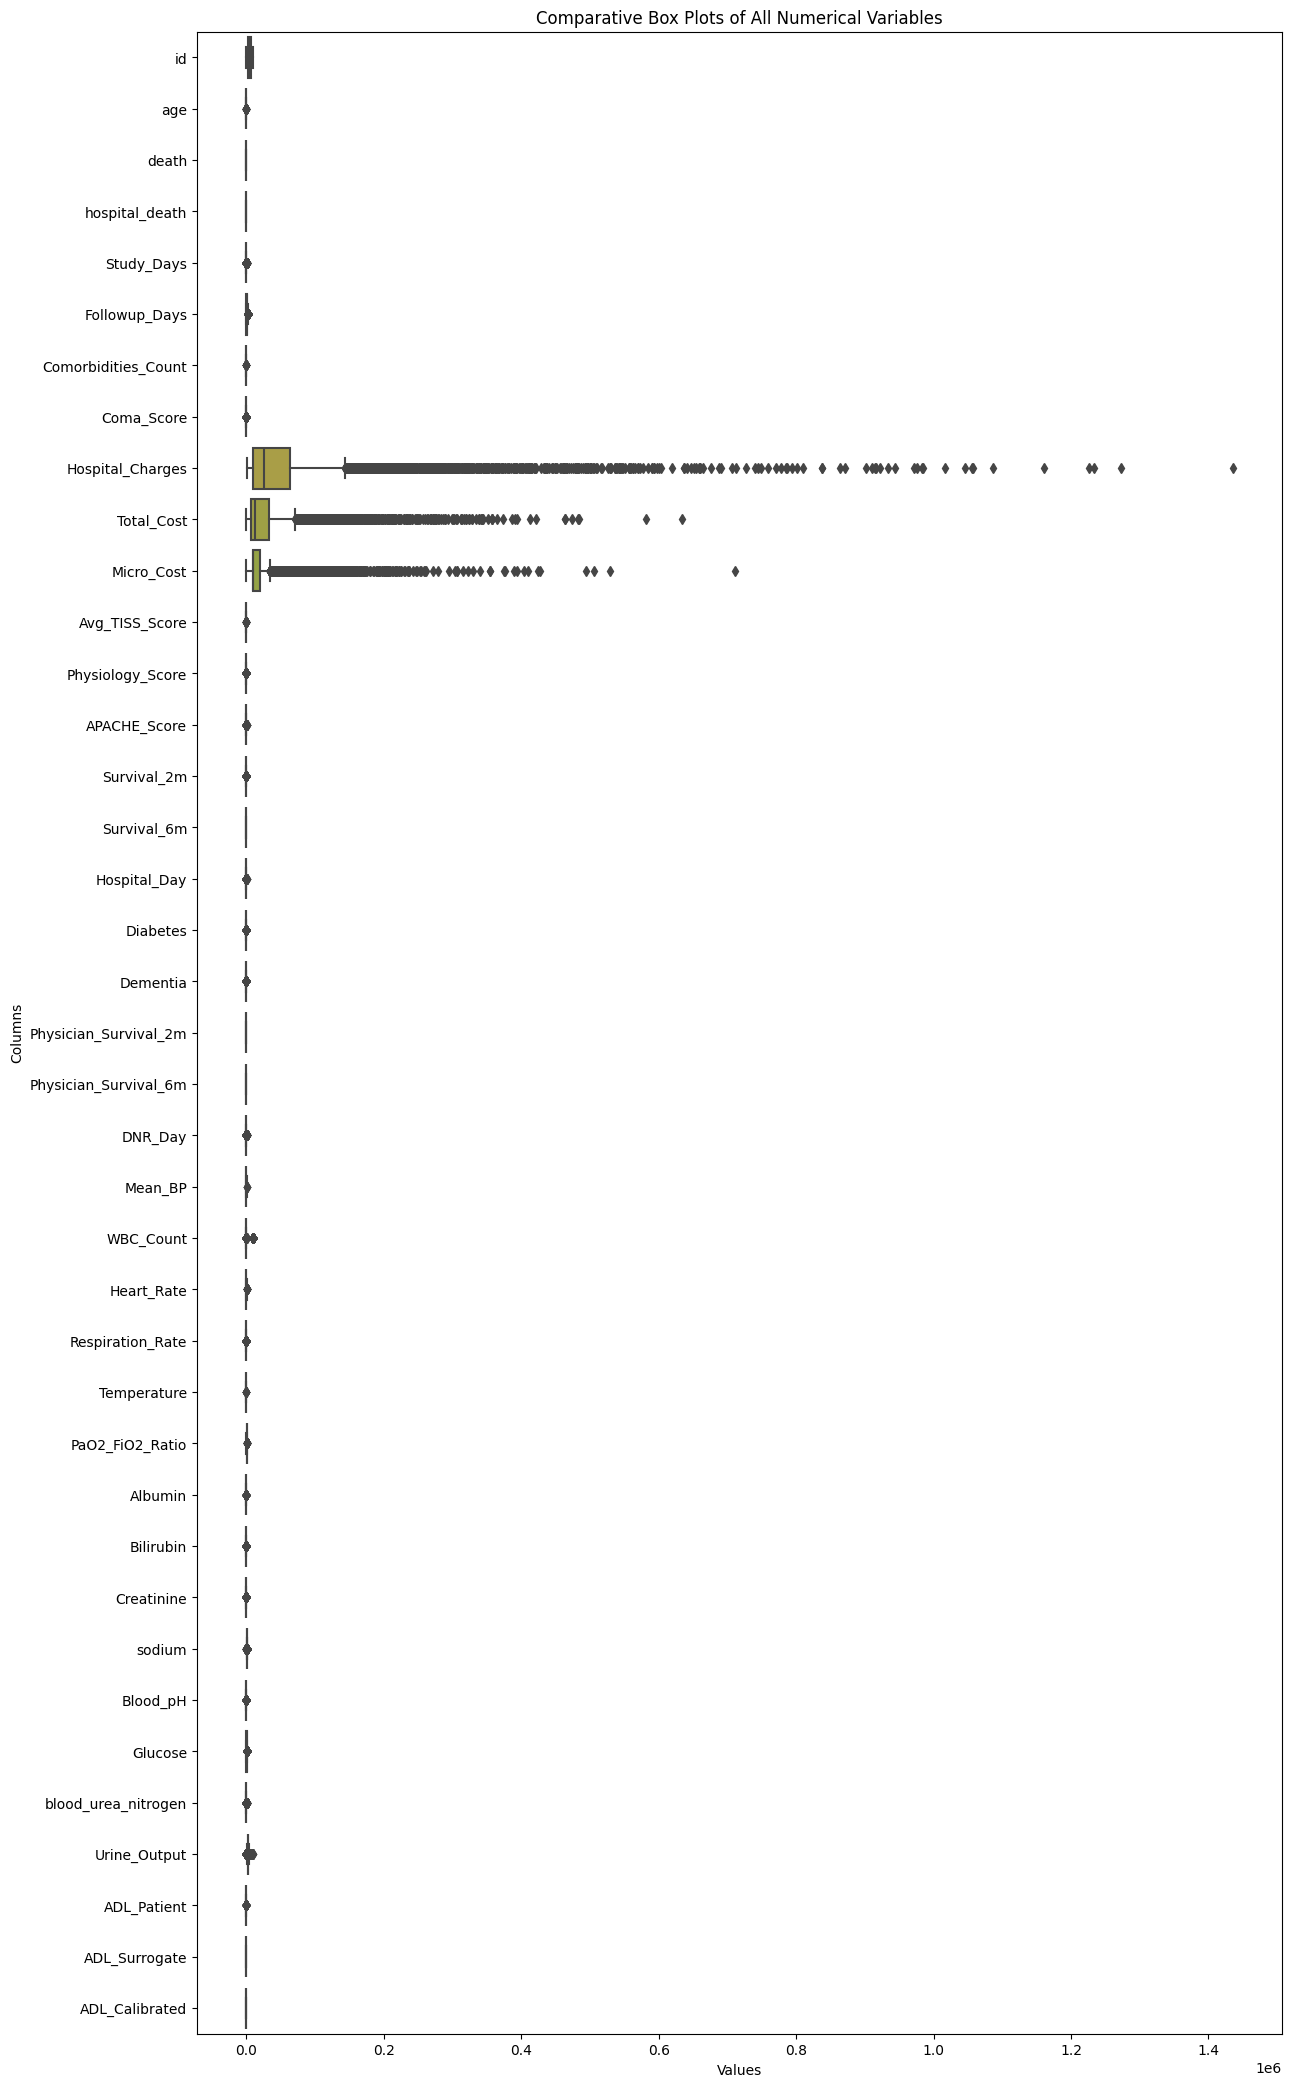

In [41]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Combine all box plots into one graph
plt.figure(figsize=(14, 26))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Comparative Box Plots of All Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

The box plots allows a comparison between the distributions of all numerical variables in the dataset next to eachoother. This helps identify similar and different distibution.

# 3.4 Boxplot for Length of Stay(Study Days) by Disease Type

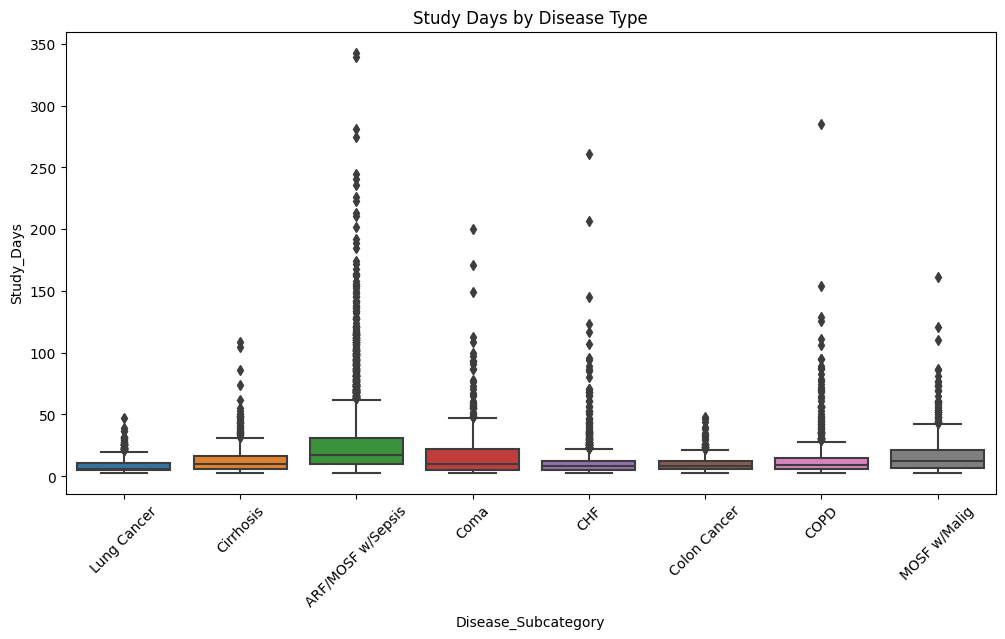

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Disease_Subcategory', y='Study_Days')
plt.title("Study Days by Disease Type")
plt.xticks(rotation=45)
plt.show()

- Patients with diseases like ARF/MOSF with sepsis and MOSF with malignancy tend to have longer hospital stays, as reflected by higher medians and greater variability in study durations.
- Conditions such as lung cancer and colon cancer show shorter and more consistent hospital stays, with fewer outliers, suggesting more predictable treatment processes.
- The wide spread and numerous outliers for some diseases highlight the complexity and extended care required for certain conditions, indicating areas where treatment efficiency could be improved.

#

# 3.5 Visualising the Age Distribution of Patient

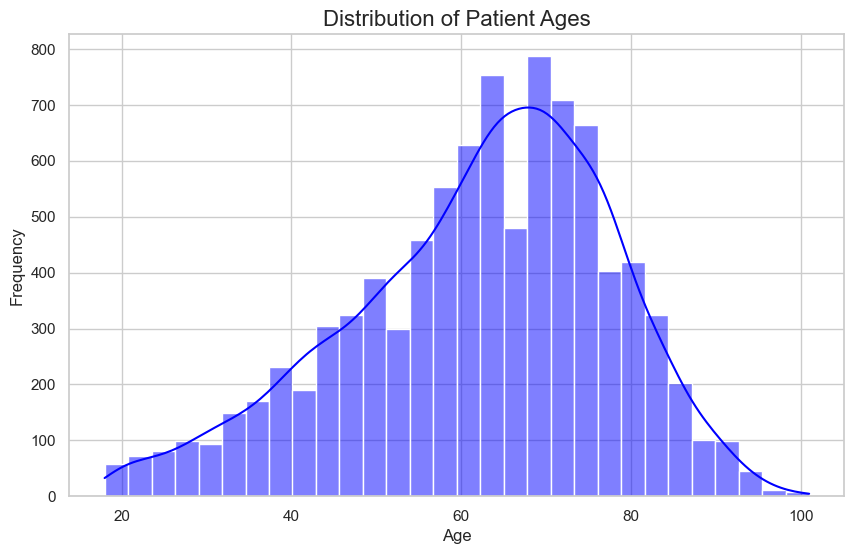

In [44]:
# Set general plot style
sns.set(style="whitegrid", palette="muted")

# Distribution of Patient Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title("Distribution of Patient Ages", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

The histogram shows the distribution of ages in your dataset, with the KDE line overlay the line overlay provides a smooth estimate of the ages distributed.


# 

# 3.6 Box Plot for Hospital Charges by Age group

In [59]:
#Group ages into bins:
df['age_group'] = pd.cut(
    df['age'], 
    bins=[0, 30, 50, 70, 90, 120], 
    labels=['0-30', '31-50', '51-70', '71-90', '91+'], 
    right=False
)


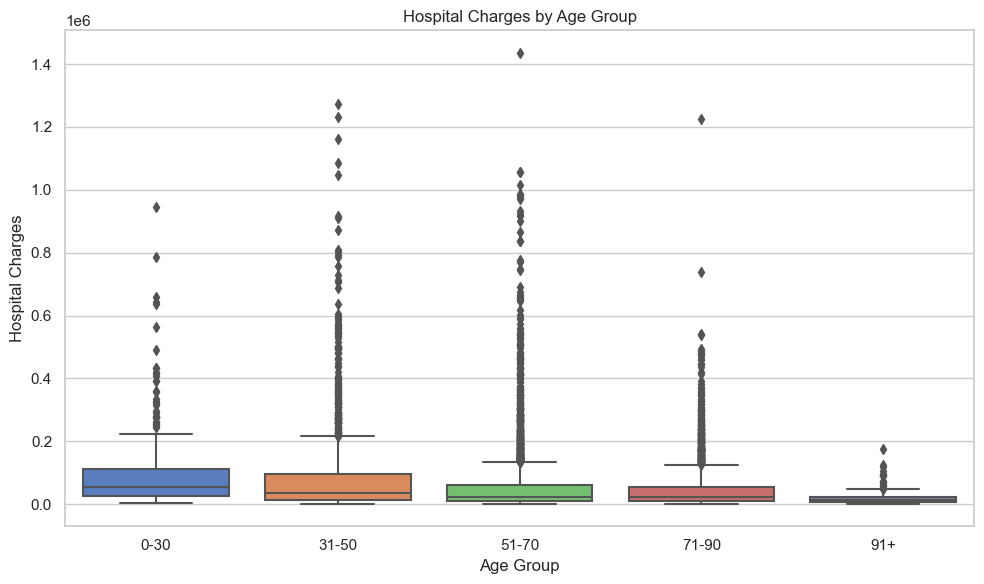

In [60]:
# Visualize Hospital Charges by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='Hospital_Charges')
plt.title("Hospital Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Hospital Charges")
plt.tight_layout()
plt.show()

- Hospital charges are fairly similar for most patients across all age groups, with no major differences in typical costs.
- Patients in the 51-70 age group tend to have more high-cost cases, possibly due to more complex or resource-intensive medical needs.
- While most patients have manageable charges, there are a few cases in every age group with exceptionally high costs, reflecting unique or challenging medical situations.

#

# 3.7 Relationship Between Age and Length of Hospital Stay

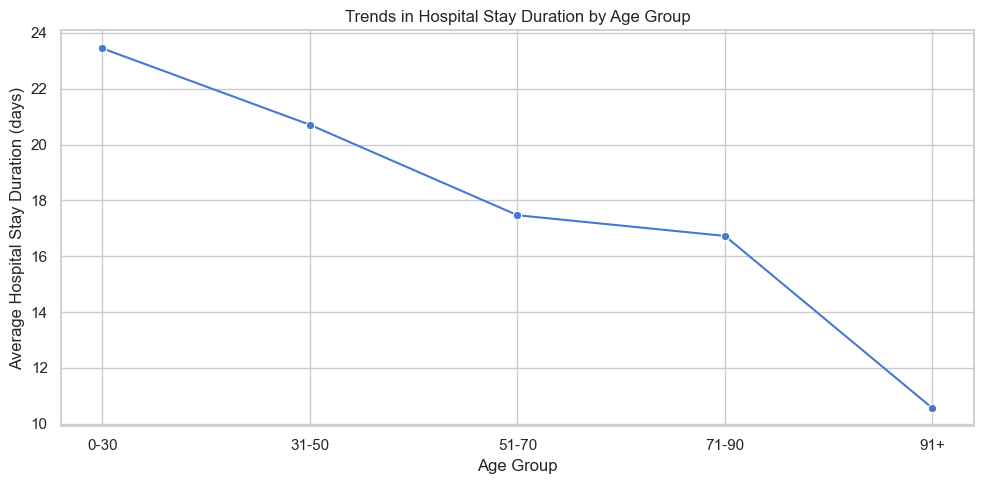

In [47]:
age_group_stay = df.groupby('age_group')['Study_Days'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=age_group_stay, x='age_group', y='Study_Days', marker="o")
plt.title("Trends in Hospital Stay Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Hospital Stay Duration (days)")
plt.tight_layout()
plt.show()
#Visualises the relationship between patients' age and the number of days they stay in the hospital.

- Younger patients aged 0-30 have the longest average hospital stays, lasting over 22 days, while older patients aged 91+ have the shortest stays, averaging around 12 days.
- As age increases, the average hospital stay duration steadily decreases, suggesting that older patients might receive quicker discharge decisions or alternative care approaches.
- The trend indicates that younger patients may need longer treatment or recovery times, possibly due to different care strategies or the severity of conditions in this age group.

#

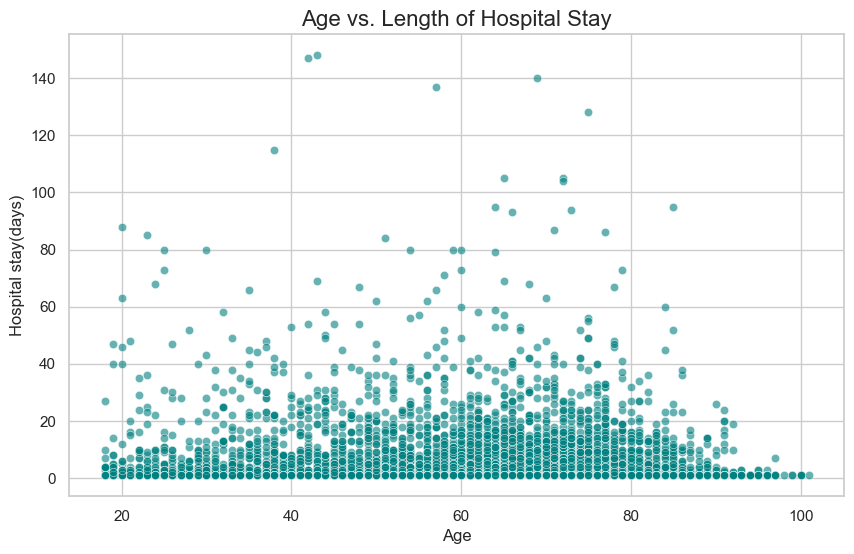

In [57]:
# Scatter Plot of Age vs. hospital Stay 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Hospital_Day', data=df, alpha=0.6, color='teal')
plt.title("Age vs. Length of Hospital Stay", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Hospital stay(days)", fontsize=12)
plt.show()

The scatter plot shows the relationship between age and the length of hospital stay. Basically tells us which ages stay longer in the hospital and which ages stay lesser.

# 3.8 Correlation Matrix of Numerical Variables

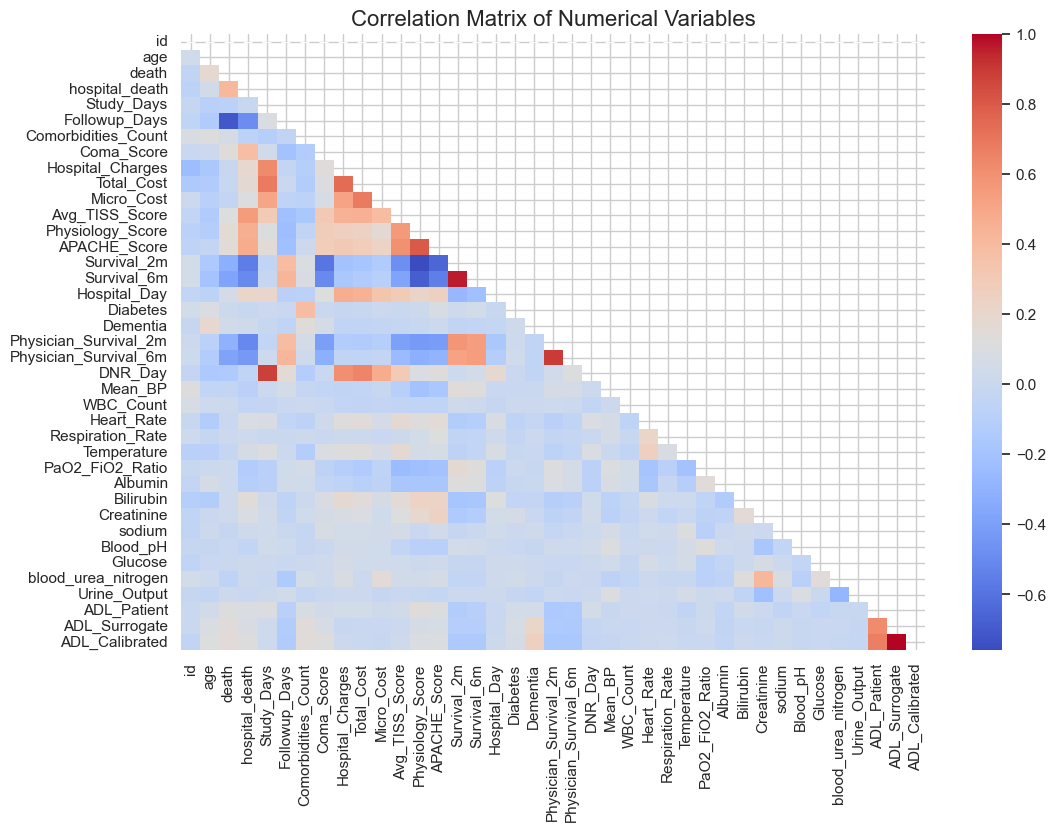

In [48]:
# Calculate Correlation Matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualize Correlation Matrix with a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.show()

This shows the correlation matrix of numerical vriables in the dataset, basically to identify the relationship betwwen numerical variables.
- It shows the pairwise corellation coefficients, with colors representing the strength and direction of the correlation.
- The upper triangle of the matrix is masked to avoid redundancy, as the correlation matrix is symmetric¶

#

# 3.9 Survival Rate statistics

# 3.9.1 The survival to death ratio

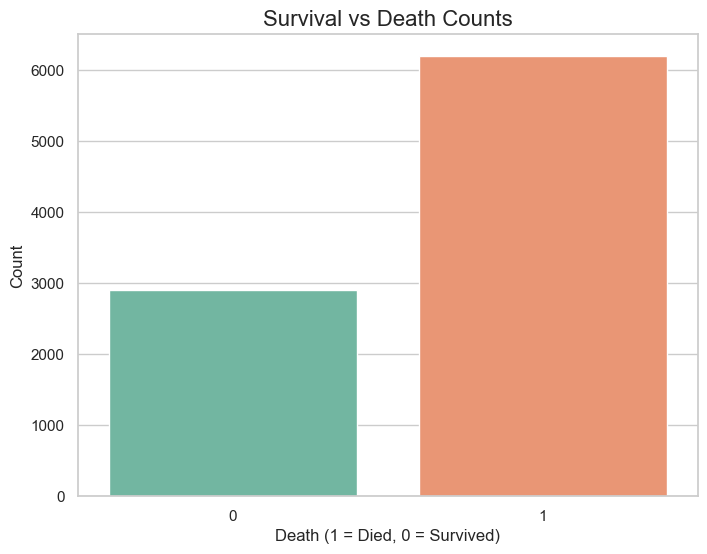

In [64]:
# Proportion of Survival vs Death
plt.figure(figsize=(8, 6))
sns.countplot(x='death', data=df, palette='Set2')
plt.title("Survival vs Death Counts", fontsize=16)
plt.xlabel("Death (1 = Died, 0 = Survived)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Visualises the distribution of survival and death in the dataset from phase one and phase two 

# 3.9.2  Which disease groups have higher or lower survival rates

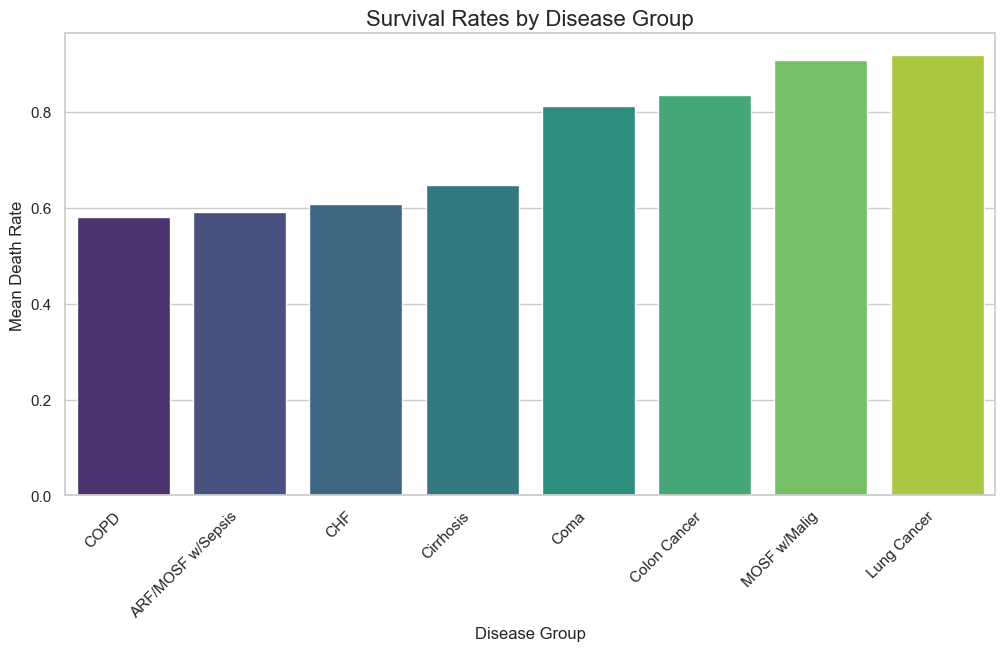

In [51]:
#Survival by Disease Group (Barplot)
plt.figure(figsize=(12, 6))
survival_by_dz = df.groupby('Disease_Subcategory')['death'].mean().sort_values()
sns.barplot(x=survival_by_dz.index, y=survival_by_dz.values, palette='viridis')
plt.title("Survival Rates by Disease Group", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Disease Group", fontsize=12)
plt.ylabel("Mean Death Rate", fontsize=12)
plt.show()


The above output is a bar plot that shows the mean death rates for different disease subcategories in the dataset.

# 3.9.3 Survival Rates at 2 and 6 Months by Gender

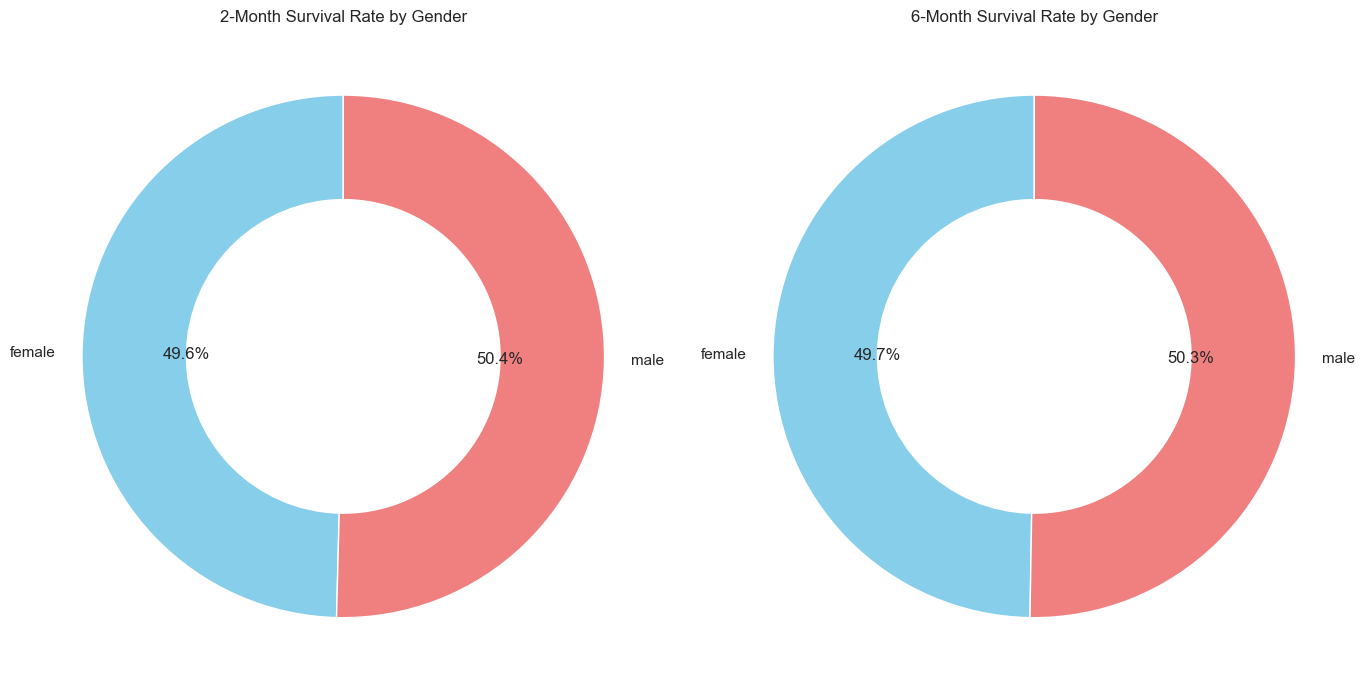

In [52]:
# Calculate survival rates by gender
survival_by_gender = df.groupby('gender')[['Survival_2m', 'Survival_6m']].mean()

# Plot donut charts for 2-month and 6-month survival rates
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 2-Month Survival Rate Donut Chart
axes[0].pie(
    survival_by_gender['Survival_2m'],
    labels=survival_by_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    wedgeprops={'width': 0.4}  # Donut effect
)
axes[0].set_title('2-Month Survival Rate by Gender')

# 6-Month Survival Rate Donut Chart
axes[1].pie(
    survival_by_gender['Survival_6m'],
    labels=survival_by_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    wedgeprops={'width': 0.4}  # Donut effect
)
axes[1].set_title('6-Month Survival Rate by Gender')

plt.tight_layout()
plt.show()


Survival rates between males and females are nearly equal, indicating gender may not be a significant factor in determining survival outcomes.

# 3.9.4 Relationships Between Health Metrics and 6-Month Physician Predicted Survival Rates

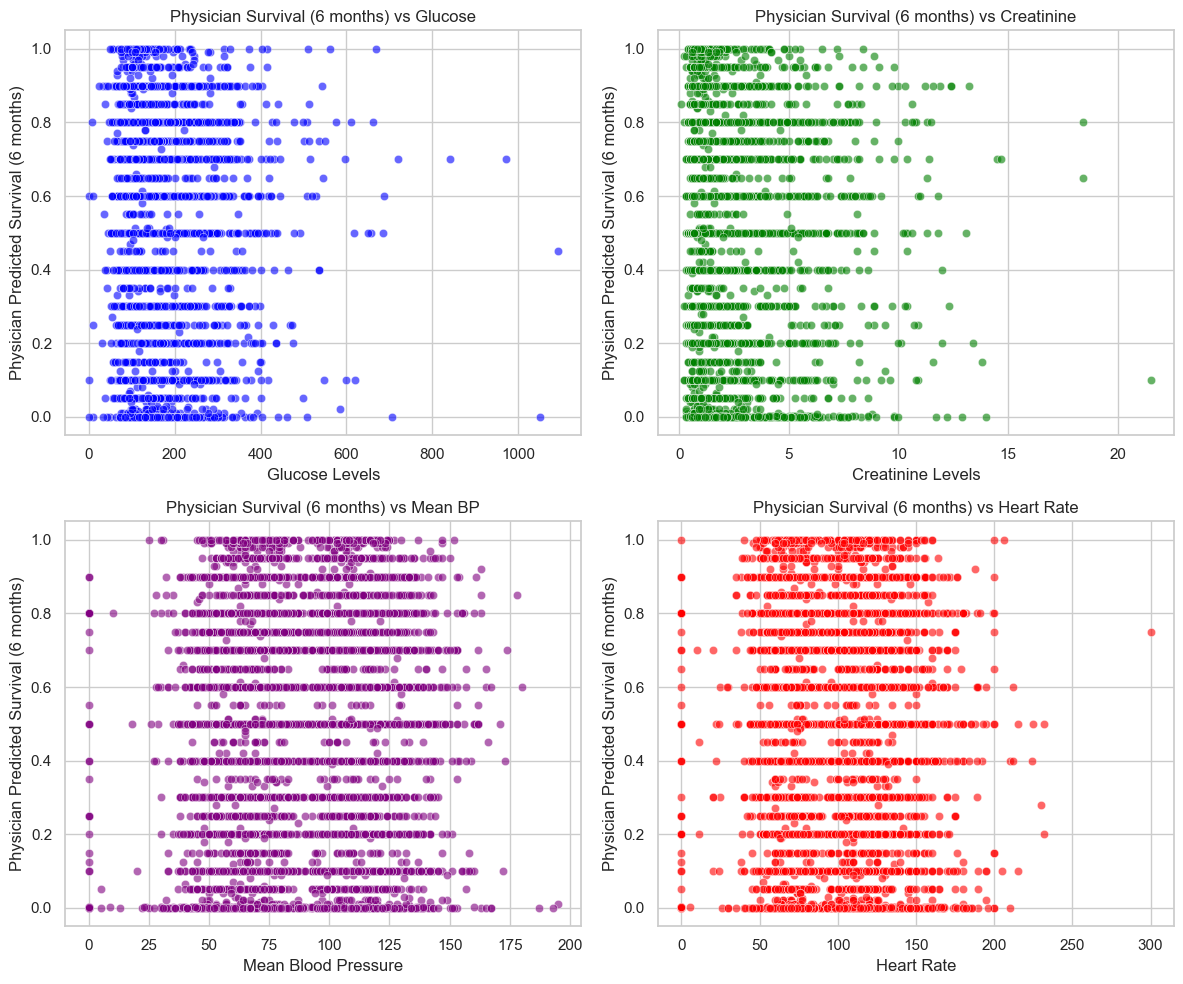

In [53]:
# Define a 2x2 grid layout for four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# First subplot: Glucose vs Physician Survival (6 months)
sns.scatterplot(data=df, x='Glucose', y='Physician_Survival_6m', ax=axes[0, 0], color='blue', alpha=0.6)
axes[0, 0].set_title('Physician Survival (6 months) vs Glucose')
axes[0, 0].set_xlabel('Glucose Levels')
axes[0, 0].set_ylabel('Physician Predicted Survival (6 months)')

# Second subplot: Creatinine vs Physician Survival (6 months)
sns.scatterplot(data=df, x='Creatinine', y='Physician_Survival_6m', ax=axes[0, 1], color='green', alpha=0.6)
axes[0, 1].set_title('Physician Survival (6 months) vs Creatinine')
axes[0, 1].set_xlabel('Creatinine Levels')
axes[0, 1].set_ylabel('Physician Predicted Survival (6 months)')

# Third subplot: Mean BP vs Physician Survival (6 months)
sns.scatterplot(data=df, x='Mean_BP', y='Physician_Survival_6m', ax=axes[1, 0], color='purple', alpha=0.6)
axes[1, 0].set_title('Physician Survival (6 months) vs Mean BP')
axes[1, 0].set_xlabel('Mean Blood Pressure')
axes[1, 0].set_ylabel('Physician Predicted Survival (6 months)')

# Fourth subplot: Heart Rate vs Physician Survival (6 months)
sns.scatterplot(data=df, x='Heart_Rate', y='Physician_Survival_6m', ax=axes[1, 1], color='red', alpha=0.6)
axes[1, 1].set_title('Physician Survival (6 months) vs Heart Rate')
axes[1, 1].set_xlabel('Heart Rate')
axes[1, 1].set_ylabel('Physician Predicted Survival (6 months)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

- Glucose Levels: Patients with extremely high glucose levels (above 600) tend to have lower survival predictions, although there’s no strong overall pattern between glucose levels and survival.
- Creatinine Levels:Higher creatinine levels (above 10) are linked to lower survival probabilities in some cases, likely reflecting the risks associated with severe kidney dysfunction.
- Mean Blood Pressure: Survival rates are evenly distributed across blood pressure values, with no clear trend, but near-zero values likely indicate fatal conditions.
- Heart Rate: No strong pattern is observed, though near-zero and extreme heart rates cluster around low survival predictions, highlighting potential risks.   
- Overall, while extreme glucose and creatinine levels show minor impacts on survival predictions, they may serve as warning signs for critical conditions. Similarly, near-zero blood pressure and heart rate outliers help identify fatal conditions, and combining these metrics could enhance early detection of poor outcomes.    

# 3.9.5 Relationships Between Health Metrics and 2-Month Physician Predicted Survival Rates

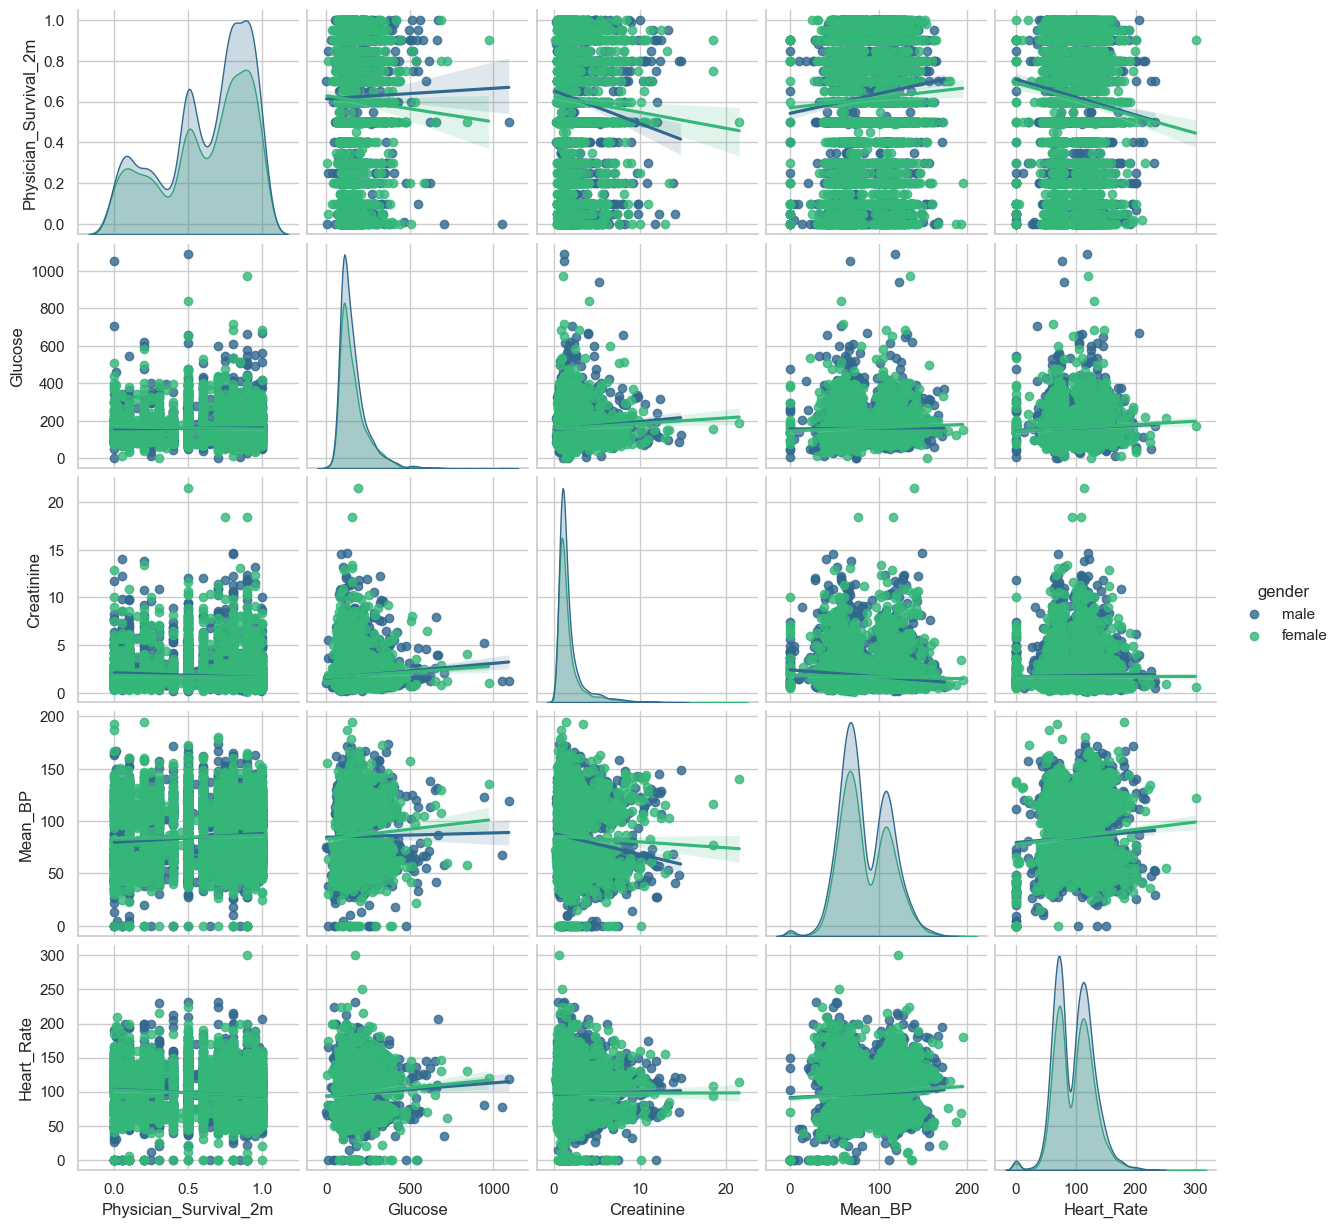

In [54]:
#visualizes pairwise relationships between health metrics(multiple variables)
sns.pairplot(data = df, vars=['Physician_Survival_2m', 'Glucose', 'Creatinine', 'Mean_BP', 'Heart_Rate'], hue='gender', palette='viridis', kind = 'reg')
plt.show()

- Glucose and Creatinine: Slight negative association with 2-month survival predictions; extreme values and outliers may indicate critical health risks.
- Mean Blood Pressure and Heart Rate: No strong trends with survival predictions, but near-zero outliers suggest fatal conditions.
- Regression Insights: Weak trends are observed for glucose and creatinine, while no significant patterns appear for blood pressure or heart rate.
- Gender Differences: Minimal variation in survival predictions or health metrics between males and females.
- Key Insight: Glucose and creatinine extremes serve as potential risk indicators, while blood pressure and heart rate mostly influence outcomes at critical outlier levels.

# 3.10 Trends in Cancer Status by Gender

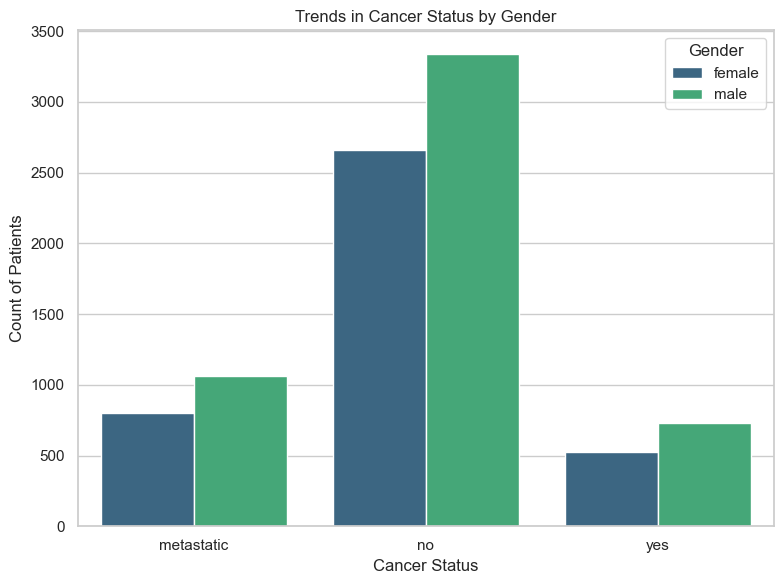

In [55]:
# Group data by cancer status and gender to calculate counts
cancer_gender_trends = df.groupby(['Cancer_Status', 'gender']).size().reset_index(name='count')

# Plot cancer status vs gender as a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=cancer_gender_trends, x='Cancer_Status', y='count', hue='gender', palette='viridis')
plt.title('Trends in Cancer Status by Gender')
plt.xlabel('Cancer Status')
plt.ylabel('Count of Patients')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


- Most patients do not have cancer, with males being more frequent than females.
- Males have higher counts in both metastatic and non-metastatic cancer categories.
- Overall, cancer diagnoses are slightly more common in males than females.

# 3.11 Diabetes Status Across Age Groups

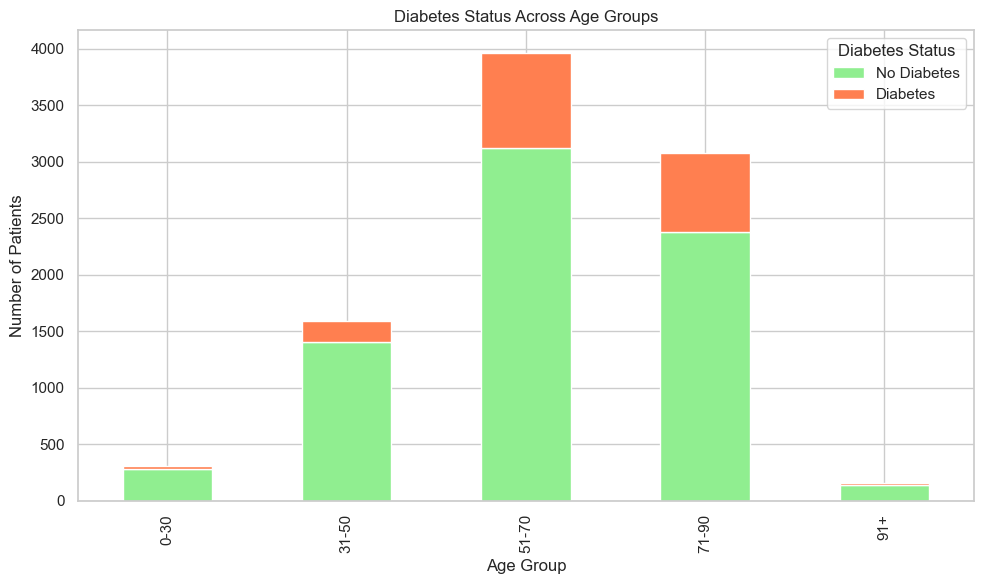

In [56]:
diabetes_age_group = df.groupby(['age_group', 'Diabetes']).size().reset_index(name='count')

# Pivot the data for stacked bar plot
diabetes_age_pivot = diabetes_age_group.pivot(index='age_group', columns='Diabetes', values='count')

# Plot the stacked bar chart
diabetes_age_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'coral'])
plt.title('Diabetes Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

- The 51-70 age group has the highest number of diabetic patients, indicating that diabetes is more prevalent in middle-aged adults.
- Diabetes is least common in the youngest (0-30) and oldest (91+) age groups, reflecting lower counts in these populations overall.
- The majority of patients in all age groups do not have diabetes, as shown by the larger green bars compared to the orange sections.

# 

# 4. Findings and Conclusions 

This analysis on the dataset provided a comprehensive overview of various health metrics and their implications for patient outcomes. By examining outliers, hospital stays, survival rates, and common conditions, we identifiede critical trends and areas for improvement in healthcare management. 

Here are the key findings:

1. Outliers in these metrics indicate patients with severe or complex conditions that require significantly higher resources.

2. Patients with ARF/MOSF with Sepsis and MOSF with Malignancy experience longer hospital stays, reflecting the complexity of managing these illnesses.

3. Lung and Colon Cancer patients generally have shorter and more predictable hospital stays, with fewer outliers.

4. Hospital charges are generally consistent across age groups; however, the 51-70 age group has a higher incidence of high-cost cases due to resource-intensive treatments.

5. Survival rates are higher for patients with Colon Cancer, Lung Cancer, and CHF, particularly at the 2-month mark.

6. Conditions such as Coma and ARF/MOSF with Sepsis exhibit much lower survival rates, underscoring their severity and the challenges in treatment.

7. Younger patients (ages 0-30) tend to have the longest hospital stays, while older patients (ages 91+) have shorter stays, likely due to expedited discharge decisions.

8. Cancer is more prevalent in males, with higher counts in both metastatic and non-metastatic categories.

9. Diabetes is most common among middle-aged adults (ages 51-70) and less prevalent in younger and older patients.

10. Extremely high glucose levels (above 600) are associated with lower survival predictions and can serve as risk indicators.

11. Elevated creatinine levels (above 10) are also linked to lower survival rates, indicating the risks associated with kidney dysfunction.

12. Blood pressure values do not show clear trends, but near-zero levels are associated with fatal outcomes.

13. Heart rate trends are not significant overall, but near-zero and extreme heart rates are linked to lower survival predictions.

14. Combining metrics such as glucose, creatinine, blood pressure, and heart rate could aid in identifying critical conditions and enhancing early interventions.

15. There is a positive relationship between age and the length of hospital stay. As people get older, they tend to stay in the hospital for longer periods.

16. There are significant gaps in the dataset were identified and visualized, necessitating careful handling through imputation or exclusion techniques.

17. The dataset encompasses demographic, clinical, and survival data from hospitalised patients, with a focus on factors influencing 180-day survival rates.

18. Factors such as age and gender exhibited notable trends; for instance, older patients demonstrated lower survival probabilities.

19. Several extreme data points were detected. Their presence could significantly impact modeling and required careful treatment or exclusion.

20. Visualisation tools revealed trends, such as decreasing survival rates with increasing comorbidities or worsening APACHE scores.

21. Variables such as age, comorbidities, and physiological scores displayed varied distributions, some of which were skewed, necessitating transformation or normalisation.

To conclude, this analysis sheds light on patient outcomes and healthcare management by examining various health metrics. We identified critical trends and areas for improvement, emphasizing the need for targeted interventions and resource allocation to enhance patient care strategies.

Resource Allocations:

- Increased Staffing and Specialized Training: More healthcare professionals and specialised training are necessary for managing complex conditions like ARF/MOSF with Sepsis and malignancies.

- Advanced Medical Equipment: Investing in advanced diagnostic and treatment equipment can better manage severe cases and improve patient outcomes.

- Enhanced Support Services: Additional support services for older patients and those with chronic conditions can ensure comprehensive care and reduce hospital stay durations.

Targeted Interventions:

- Early Detection Programs: Implementing early detection and screening programs for conditions like diabetes and cancer can improve early intervention and treatment outcomes.

- Personalised Treatment Plans: Developing personalised treatment plans based on patient-specific data, such as age, comorbidities, and physiological scores, can optimize care and resource utilization.

- Preventive Care Initiatives: Promoting preventive care initiatives to manage risk factors like high glucose and creatinine levels, which are associated with lower survival rates, is crucial.

These strategies aim to enhance predictive modeling, improve patient care, and ensure efficient use of healthcare resources. Future research should continue to explore these variables to further refine our understanding and approach to managing complex health conditions.